# Project One: Moive Recommendations

We have an exciting project that will further build your ML abilities and end with a  
practical model that you may find useful for yourself! 

We will work through a series of steps:
1. Understand the Overarching Task
2. Acquire and Load the Data
3. Prepare the Data (for ML)
4. Selecting and Training an ML Model
5. Presenting an Analysis on the Solution

Similar to project 1, we will consolidate this notebook into three following steps:

* Tasks 1-2 fall will be under Exploratory Data Analysis (EDA).
* Tasks 3-4 will involve building a prediction engine for movies.
* Finally, we have our analysis in task five.


For this project, the data is on movies from 1996 to 2018, with just over 100K ratings across *over 9000* movies.  
Details on the dataset are available at https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html

* The dataset is attached on the assignment page as a zip.
* It is also available for download at https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [118]:
#install any libraries you may need
import pandas as pd # for dataframes from CSV file
import numpy as np # for numerical computation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns  #for statistical data visualilization 

### Exploratory Data Analysis (20%)

The task here is to construct a big picture view of the data set.

1. Download and load the dataset using pandas. Collect data into a single dataframe (if needed).
2. Print statistics - use the head, info, describe functions
3. Feature engineer a column for the score using a metric such as weight rating. 
4. Visualize the data

In [119]:
#use multiple code blocks to organize your code
#EDA 

#PART 1, download and load datasets using pandas
# Load the CSV files
# Load the CSV files
ratings = pd.read_csv('C:\\Users\\ollie\\OneDrive\\Desktop\\Data Analyst\\DS5033-Data-Mining-and-Machine-Learning Movie Rec\\DS5033-Data-Mining-and-Machine-Learning-MovieRec\\ratings.csv')
tags = pd.read_csv('C:\\Users\\ollie\\OneDrive\\Desktop\\Data Analyst\\DS5033-Data-Mining-and-Machine-Learning Movie Rec\\DS5033-Data-Mining-and-Machine-Learning-MovieRec\\tags.csv')
movies = pd.read_csv('C:\\Users\\ollie\\OneDrive\\Desktop\\Data Analyst\\DS5033-Data-Mining-and-Machine-Learning Movie Rec\\DS5033-Data-Mining-and-Machine-Learning-MovieRec\\movies.csv')

# Display messages and dataset information with clear formatting
print("Datasets loaded successfully!")

#Now I'm going to merge the df's into a single datafraem
# Merge movies and ratings on 'movieId'
movies_ratings = pd.merge(movies, ratings, on='movieId', how='inner')

# Merge the result with tags on 'movieId'
final_df = pd.merge(movies_ratings, tags, on='movieId', how='left')

print("\nFinal DataFrame Created!\n")


print("Combined dataset saved to 'final_combined_dataset.csv'")
print("\nFinal DataFrame Created!\n")

print("Let's take a look at some initial data and statistics.\n")

#Part 2, print statistics

# Display the `describe` statistics
print("Describe:\n")
#print(final_df.describe(include='all'))  # Include all columns (numeric and non-numeric)
print(final_df.describe())
print("\n")

# Display the DataFrame's info
print("Info:\n")
final_df.info()
print("\n")

# Display the first few rows (head) with all columns visible
print("Head of the DataFrame:\n")
pd.set_option('display.max_columns', None)  # Ensure all columns are visible
pd.set_option('display.width', 1000)       # Avoid line wrapping
print(final_df.head())

Datasets loaded successfully!

Final DataFrame Created!

Combined dataset saved to 'final_combined_dataset.csv'

Final DataFrame Created!

Let's take a look at some initial data and statistics.

Describe:

             movieId       userId_x         rating   timestamp_x       userId_y   timestamp_y
count  285762.000000  285762.000000  285762.000000  2.857620e+05  233213.000000  2.332130e+05
mean    14927.386405     313.894279       3.841270  1.214707e+09     470.683564  1.384774e+09
std     31403.373103     179.451387       1.020798  2.233730e+08     153.329632  1.534621e+08
min         1.000000       1.000000       0.500000  8.281246e+08       2.000000  1.137179e+09
25%       296.000000     160.000000       3.000000  1.019133e+09     424.000000  1.242494e+09
50%      1721.000000     314.000000       4.000000  1.211377e+09     477.000000  1.457901e+09
75%      5673.000000     465.000000       4.500000  1.445346e+09     599.000000  1.498457e+09
max    193609.000000     610.000000       

In [120]:
#EDA Continued
#Part 4,  Feature engineer a column for the score using a metric such as weight rating.
"""""
Weighted Score= (v⋅R)+(m⋅C) /(v+m)

Where:


R: The average rating for the item.

v: The number of votes for the item.

m: A minimum threshold of votes required for consideration (helps reduce noise from low-vote items).

C: The average rating across all items.
"""


#find the mean of all movie ratings
C = final_df['rating'].mean()

# Calculate m: the 80th percentile of the number of ratings per movie
m = final_df.groupby('movieId').size().quantile(0.8)

# Group by 'movieId' to compute v (number of ratings) and r (average rating)
movie_stats = final_df.groupby('movieId').agg(
    v=('userId_x', 'count'),      # v: number of ratings
    r=('rating', 'mean')         # r: average rating
).reset_index()

# Add C and m to the movie_stats DataFrame for reference
movie_stats['C'] = C
movie_stats['m'] = m


# Calculate the weighted rating using the formula
movie_stats['weighted_rating'] = ((movie_stats['v'] * movie_stats['r']) + (m * C)) / (movie_stats['v'] + m)



# Merge the weighted ratings back into the original DataFrame
final_df = pd.merge(final_df, movie_stats[['movieId', 'weighted_rating']], on='movieId', how='left')

# Display a sample of the final DataFrame with the new weighted_rating column
#print(final_df[['movieId', 'title', 'rating', 'weighted_rating']].head())

# Let's sort movies by their weighted rating and see the top 10.
top_movies = final_df[['movieId', 'title', 'weighted_rating']].drop_duplicates().sort_values(by='weighted_rating', ascending=False)
print("Top Movies by Weighted Rating:\n", top_movies.head(10))

Top Movies by Weighted Rating:
         movieId                                              title  weighted_rating
84016       318                   Shawshank Redemption, The (1994)         4.423512
285190   174053               Black Mirror: White Christmas (2014)         4.409226
187512     3451                Guess Who's Coming to Dinner (1967)         4.394558
222063     6818                 Come and See (Idi i smotri) (1985)         4.367965
185918     3266  Man Bites Dog (C'est arrivé près de chez vous)...         4.335318
284234   158966                           Captain Fantastic (2016)         4.311791
121106     1178                              Paths of Glory (1957)         4.308201
169020     2959                                  Fight Club (1999)         4.272496
110906      922      Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         4.269841
202544     4454                                        More (1998)         4.268171


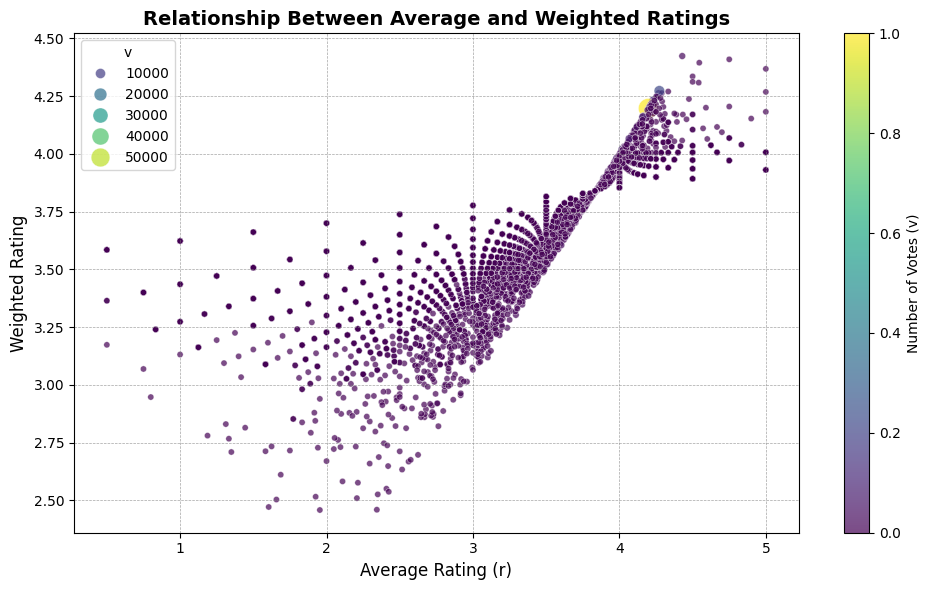

In [121]:
#EDA finished, visualize data

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=movie_stats,
    x='r',
    y='weighted_rating',
    size='v',
    hue='v',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7
    )
plt.title('Relationship Between Average and Weighted Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating (r)', fontsize=12)
plt.ylabel('Weighted Rating', fontsize=12)
plt.colorbar(scatter.collections[0], label='Number of Votes (v)')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

### Data Prep and Cleaning (10%)

Here, you will work to further investigate your features.

1. Analyze and drop redundant data
2. Remove missing data records
3. Make splits of the data based on users (such a number of reviews)

In [122]:
#use multiple code blocks to organize your code
#Data Prep and Cleaning

#step 1 analyze and drop redundant data
final_df.drop_duplicates()

# Show rows with NaN values
rows_with_na = final_df[final_df.isna().any(axis=1)]
print('Number of rows with missing data')
print(rows_with_na.count())

#step 2 remove missing rows
#I''m going to remove these rows. There are 285762 movies, and only 52549 rows with missing values. \n Thus I''ll drop these rows')
final_df = final_df.dropna()
print()
# Verify after removal
print(f"Rows remaining after dropping missing values: {len(final_df)}")

print()
print('Now we have no missing data records, as seen below')
print(final_df)


Number of rows with missing data
movieId            52549
title              52549
genres             52549
userId_x           52549
rating             52549
timestamp_x        52549
userId_y               0
tag                    0
timestamp_y            0
weighted_rating    52549
dtype: int64

Rows remaining after dropping missing values: 233213

Now we have no missing data records, as seen below
        movieId                           title                                       genres  userId_x  rating  timestamp_x  userId_y        tag   timestamp_y  weighted_rating
0             1                Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy         1     4.0    964982703     336.0      pixar  1.139046e+09         3.919475
1             1                Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy         1     4.0    964982703     474.0      pixar  1.137207e+09         3.919475
2             1                Toy Story (1995)  Adventure|Animation|C

In [123]:
#Data Prep and Cleaning

#Step 4, split data based on number of reviews

# Count reviews per user
user_review_count = final_df.groupby('userId_x').size().reset_index(name='review_count')

# Merge the review count back into the original DataFrame
final_df = final_df.merge(user_review_count, on='userId_x', how='left')
print(final_df.columns)
print(user_review_count.head())  # Check the structure of the user_review_count DataFrame


# Now, the column from the merge will be named 'review_count_x' and 'review_count_y'
# We want to use 'review_count_x' for the count of reviews

# Split based on the number of reviews
low_activity = final_df[final_df['review_count'] < 10]
medium_activity = final_df[(final_df['review_count'] >= 10) & (final_df['review_count'] <= 50)]
high_activity = final_df[final_df['review_count'] > 50]

print()
#Descriptive statistics for each activity gorup
print("Low activity reviews (less than 10 reviews):")
print(low_activity['review_count'].describe())

print('\n Medium activity reviews (between 10 and 50 reviews)')
print (medium_activity['review_count'].describe())

print('\n High activity reviews (More than 50 reviews)')
print (high_activity['review_count'].describe())


Index(['movieId', 'title', 'genres', 'userId_x', 'rating', 'timestamp_x', 'userId_y', 'tag', 'timestamp_y', 'weighted_rating', 'review_count'], dtype='object')
   userId_x  review_count
0         1           593
1         2           143
2         3            27
3         4           580
4         5           278

Low activity reviews (less than 10 reviews):
count    28.000000
mean      7.357143
std       1.568540
min       5.000000
25%       6.000000
50%       8.000000
75%       9.000000
max       9.000000
Name: review_count, dtype: float64

 Medium activity reviews (between 10 and 50 reviews)
count    2182.000000
mean       36.066911
std        11.312133
min        10.000000
25%        28.000000
50%        38.000000
75%        47.000000
max        50.000000
Name: review_count, dtype: float64

 High activity reviews (More than 50 reviews)
count    231003.000000
mean        737.618806
std         493.842632
min          51.000000
25%         348.000000
50%         632.000000
75%      

### Moive Recommendation (40%)

Now you will create and test many ML models. The idea is to play with hyperparameters and model types.
You may find that some of your data prep needs further tweaking.

Generally, you will want to follow the order of steps below (with 1&2 already completed):

1. Create a copy of your data.
2. Create a train & test split. Generally, 80-20 splits work, but you can play with this.
3. Use a model you understand well for prediction.
4. Improve your model(s) using cross-validation.

Evaluate the model using the top 10 hits from 2015 (ask for the next 3 recommendations based on each of the following):  

1. Chi-Raq
2. Creed
3. Son of Sau
4. Carol
5. 45 Years
6. Brooklyn
7. Spotlight
8. Anomalisa
9. Inside Out
10. Mad Max

Ranking from: https://www.rogerebert.com/features/the-ten-best-films-of-2015

In [124]:
#use multiple code blocks to organize your code

### Analysis (30%):

A critical component in science is communicating your results and explaining the reseasoning behind the results.
A good presentation here should include the following:  

1. An introduction to the dataset, any things we should know (e.g. how it was collected, common errors). 
2. What did you discover in your EDA? What do you do with missing values, outliers, etc.  
3. What kind of distribution is the data? Is there a skew or high concentration of ratings around a genre?  
4. What correlations were revealed in the analysis? e.g. any attributes that correlate positively?  
5. Feature selection: which feature worked for recommendations and what was noise? How did you determine?

The points above are for guidance; you can choose your template and structure.  
The idea is to present a short report (no word counts) that is structured. 
structured, clear, and concise.  
You can refer back to your figures and use external links to explain your insights.

### use this markdown cell to write a report

[here]

### Submission:

You need to prepare your ipynb/jupyter notebook for grading.
The two main tasks are ensuring all your cell outputs are present and that you convert the notebook to PDF.

The instructs will vary slightly based on the platform (collab, kaggle, anaconda, etc).
Generally, inside the notebook, you will want to:
1. Restart & clear all cell outputs (optional, may detect buggy program control flow)
2. Run all (must do; I need to see your code cell outputs!)

Next, you need to download the notebook as a PDF. Unfortunately, exporting as PDF is a bit tricky.
An easy work around:
1. Download the notebook. (all platforms allow the default .ipynb export)
2. https://onlineconvertfree.com/convert-format/ipynb-to-pdf/

If you are unable to upload as a PDF, submit the .ipynb. Do NOT upload a .py file.

### Rubric:

Please see the associated percentage allocations.  
In general, ensure your code runs correctly.  Make your the PDF upload includes your code ouputs.  
You will be given significant credit for documentation and pseudo-code.

For more details, please read the rubric PDF in the assignment files.